<a href="https://colab.research.google.com/github/cswcjt/Factor-Momentum/blob/main/VAA(Dual_Momentum)_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 0: Import Packages
### Part 1: Download Asset Price
### Part 2: Apply Factors to Select Assets 
### Part 3: Static Allocation 
### Part 4: Dynamic Allocation
### Part 5: Backtesting 

In [1]:
!pip install fredapi --queit


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --queit


In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

#import module
from my_module.price_info import *
from my_module.port_weight import *
from my_module.backtest import *

In [3]:
import datetime as dt
import pandas as pd
#from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fredapi import Fred
import yfinance as yf
from functools import reduce

### Part 1: Download Asset Price

In [34]:
risky_asset = ['GOOGL', 'KO', 'HD', 'INTU', 'PEP', 'NOW', 'TSLA', 'UNH']
bond_asset = ["SHV", "IEF", "TLT", 'IAU', 'SLV', 'VNQ']
canary_asset = ["VWO", "BND"]
#econ_ind = ['UNRATE', 'SP500']
all_tickers = risky_asset + bond_asset + canary_asset

In [35]:
#econ_df = econ_info(econ_ind)
all_ticker_df = get_price_info(all_tickers)
#all_ticker_df = pd.concat([all_price_df, econ_df], axis = 1)

type(all_ticker_df.index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

pandas.core.indexes.datetimes.DatetimeIndex

In [36]:
for col in all_ticker_df.columns : 
    print(col, all_ticker_df[col].first_valid_index())
    
start = "2012-06-29"
all_ticker_df = all_ticker_df.loc[start : ]
all_ticker_df

GOOGL 2004-08-19 00:00:00
KO 1962-01-02 00:00:00
HD 1981-09-22 00:00:00
INTU 1993-03-12 00:00:00
PEP 1972-06-01 00:00:00
NOW 2012-06-29 00:00:00
TSLA 2010-06-29 00:00:00
UNH 1984-10-17 00:00:00
SHV 2007-01-11 00:00:00
IEF 2002-07-30 00:00:00
TLT 2002-07-30 00:00:00
IAU 2005-01-28 00:00:00
SLV 2006-04-28 00:00:00
VNQ 2004-09-29 00:00:00
VWO 2005-03-10 00:00:00
BND 2007-04-10 00:00:00


,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
Date,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.154282,41.959534,53.893169,52.216068,24.600000,2.086000,49.762325,102.687904,89.848366,97.563118,31.120001,26.650000,43.129223,29.418528,64.217323
2012-07-02,14.526276,28.417130,41.975365,54.192837,52.289974,24.770000,2.026667,47.856892,102.678535,90.265182,98.569725,31.120001,26.730000,43.603821,29.447987,64.352364
2012-07-03,14.710460,28.503551,40.898472,54.619629,52.289974,25.309999,2.044000,46.683014,102.687904,90.040054,97.812210,31.600000,27.490000,43.860889,29.985819,64.260826
2012-07-05,14.912913,28.247900,41.262730,54.410767,51.853958,25.959999,2.082000,47.474091,102.678535,90.281853,98.312103,31.260000,26.879999,43.590618,29.727955,64.443901
2012-07-06,14.664164,28.139879,41.294395,52.708443,51.890919,25.840000,2.066000,47.482605,102.687904,90.598671,99.225761,30.840000,26.299999,43.696102,29.190128,64.504974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996
2023-01-03,89.120003,62.950001,315.910004,391.179993,179.410004,385.500000,108.099998,518.640015,109.940002,96.529999,101.459999,34.880001,22.049999,82.559998,39.400002,72.220001


In [37]:
###1.3 cash 만들어주기
# all_ticker_df['CASH'] = 0.005/250
# all_ticker_df['CASH'] = (1 + all_ticker_df['CASH']).cumprod()
# all_ticker_df.dropna(inplace = True)
# all_ticker_df.index.name = "date_time"
# all_ticker_df

In [38]:
# 1.4 drop the repeated columns 
all_ticker_df.index.name = "date_time"
price_df = all_ticker_df.loc[:,~all_ticker_df.columns.duplicated()].copy()
price_df.isna().sum()
price_df#.to_csv("./price_df")

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
date_time,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.154282,41.959534,53.893169,52.216068,24.600000,2.086000,49.762325,102.687904,89.848366,97.563118,31.120001,26.650000,43.129223,29.418528,64.217323
2012-07-02,14.526276,28.417130,41.975365,54.192837,52.289974,24.770000,2.026667,47.856892,102.678535,90.265182,98.569725,31.120001,26.730000,43.603821,29.447987,64.352364
2012-07-03,14.710460,28.503551,40.898472,54.619629,52.289974,25.309999,2.044000,46.683014,102.687904,90.040054,97.812210,31.600000,27.490000,43.860889,29.985819,64.260826
2012-07-05,14.912913,28.247900,41.262730,54.410767,51.853958,25.959999,2.082000,47.474091,102.678535,90.281853,98.312103,31.260000,26.879999,43.590618,29.727955,64.443901
2012-07-06,14.664164,28.139879,41.294395,52.708443,51.890919,25.840000,2.066000,47.482605,102.687904,90.598671,99.225761,30.840000,26.299999,43.696102,29.190128,64.504974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996
2023-01-03,89.120003,62.950001,315.910004,391.179993,179.410004,385.500000,108.099998,518.640015,109.940002,96.529999,101.459999,34.880001,22.049999,82.559998,39.400002,72.220001


In [39]:
rebal_dates = get_rebal_dates(price_df, 'month')
type(rebal_dates)
rebal_dates

DatetimeIndex(['2012-06-29', '2012-07-31', '2012-08-31', '2012-09-28',
               '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
               '2013-02-28', '2013-03-28',
               ...
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-30', '2023-01-05'],
              dtype='datetime64[ns]', length=128, freq=None)

### Part 2: Apply Factors to Select Assets 

In [43]:
##### PART2. MOMENTUM
###2.1 : TOTAL MOMENTUM 
momentum_df = price_df.loc[rebal_dates].copy()
momentum_result_df = (12*momentum_df.pct_change(1)) + (4*momentum_df.pct_change(3)) \
                                                      + (2*momentum_df.pct_change(6)) \
                                                      + (1*momentum_df.pct_change(12))

momentum_result_df = momentum_result_df.dropna()
momentum_result_df.head()
display(momentum_result_df)

###2.2 : MOMENTUM SCORE OF CANARY ASSET
canary_signal_series = (momentum_result_df[canary_asset] > 0).sum(axis=1)
canary_signal_series
momentum_result_df['canary_signal'] = canary_signal_series
type(momentum_result_df.index)

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
2013-06-28,1.566879,0.413166,1.362797,0.365283,1.017516,2.979814,15.282918,1.771945,-0.003017,-0.586209,-0.869690,-2.976806,-3.611526,-0.088089,-1.200006,-0.373147
2013-07-31,1.159104,0.007643,1.504675,1.073310,0.845866,2.961994,18.014296,3.344662,0.004144,-0.392317,-1.033768,-0.138885,-1.665727,-0.026863,-0.504825,-0.141532
2013-08-30,-0.313575,-0.673859,-0.352620,0.365576,-0.318357,3.404855,18.647612,1.468719,0.001188,-0.516704,-0.766258,0.227564,1.760951,-1.254887,-0.994205,-0.285183
2013-09-30,0.757498,-0.275325,0.698638,1.051463,0.161182,3.655857,18.746038,1.251433,0.003518,0.098107,-0.328583,-0.859913,-1.347009,0.271579,0.952192,0.090447
2013-10-31,3.777114,0.504111,0.726168,2.064650,1.066232,3.075061,7.300350,-0.264042,-0.002396,0.012461,-0.128726,-0.482701,-0.001979,0.553887,0.842888,0.085042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,-2.791416,-1.505769,-0.741039,-1.871706,-0.513875,-3.434704,-0.221420,-0.044858,0.017370,-1.149609,-2.108072,-1.011990,-0.196226,-2.668379,-2.288173,-1.017379
2022-10-31,-1.598159,0.551846,0.651828,0.761697,1.824092,0.501535,-3.462412,1.717167,0.040920,-0.874052,-2.129311,-0.872434,-0.676179,-0.779015,-1.473756,-0.743470
2022-11-30,0.042708,1.326609,1.742398,-1.173346,1.030899,-0.871429,-3.855313,0.541619,0.080684,0.090276,0.033475,1.080111,2.872125,0.227342,1.458098,0.161958
2022-12-30,-2.597934,0.731702,0.417825,-0.878034,0.477117,-1.463863,-8.103257,0.009396,0.113574,-0.409487,-0.941354,0.751775,2.353435,-0.837176,-0.176476,-0.223890


pandas.core.indexes.datetimes.DatetimeIndex

### Part 3: Static Allocation 

In [11]:
### VAA의 횡적 자산분배 방식 
### 3: VAA 모멘텀 구현 -> factor class의 method에 포함될 부분

def set_weight(series) -> pd.Series:
    signal = series.loc["canary_signal"]
    if signal == 0 :
        target_assets1 = series.loc[bond_asset].sort_values().iloc[-5:].index
        return pd.Series([1/len(target_assets1)] * len(target_assets1),
                         index=target_assets1.tolist())
    elif signal == 1 :
        target_assets1 = series.loc[bond_asset].sort_values().iloc[-5:].index
        target_assets2 = series.loc[risky_asset].sort_values().iloc[-5:].index
        return pd.Series([1/(len(target_assets1) + len(target_assets2))] * (len(target_assets1) + len(target_assets2)),
                          index=target_assets1.tolist() + target_assets2.tolist()) 
    elif signal == 2:
        target_assets1 = series.loc[risky_asset].sort_values().iloc[-5:].index
        return pd.Series([1/len(target_assets1)] * len(target_assets1),
                         index=target_assets1.tolist())


In [12]:
###3.1: check weight
target_weight_df = momentum_result_df.apply(set_weight, axis=1).fillna(0)
target_weight_df#.sum(axis = 1)

,GOOGL,HD,IAU,IEF,INTU,KO,NOW,PEP,SHV,SLV,TLT,TSLA,UNH,VNQ
2013-06-28,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2
2013-07-31,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2
2013-08-30,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0
2013-09-30,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.0
2013-10-31,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0
2022-10-31,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.2
2022-11-30,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0
2022-12-30,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.2


### Part 4: Dynamic Allocation
-> 생략된 부분

### Part5. Backtesting

,BND,GOOGL,HD,IAU,IEF,INTU,KO,NOW,PEP,SHV,SLV,TLT,TSLA,UNH,VNQ,VWO
date_time,,,,,,,,,,,,,,,,
2013-06-28,NaN,0.000000,0.000000,0.200000,0.200000,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.200000,0.0,0.000000,0.200000,NaN
2013-07-01,NaN,0.000000,0.000000,0.203003,0.200076,0.0,0.000000,0.0,0.000000,0.200036,0.000000,0.200403,0.0,0.000000,0.199563,NaN
2013-07-02,NaN,0.000000,0.000000,0.201168,0.200154,0.0,0.000000,0.0,0.000000,0.200036,0.000000,0.200276,0.0,0.000000,0.202619,NaN
2013-07-03,NaN,0.000000,0.000000,0.202502,0.199764,0.0,0.000000,0.0,0.000000,0.200036,0.000000,0.199677,0.0,0.000000,0.201281,NaN
2013-07-05,NaN,0.000000,0.000000,0.197998,0.196403,0.0,0.000000,0.0,0.000000,0.200054,0.000000,0.192870,0.0,0.000000,0.200320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,NaN,0.698819,0.799518,0.000000,0.000000,0.0,0.819919,0.0,0.808820,0.000000,0.000000,0.000000,0.0,0.793952,0.000000,NaN
2022-12-29,NaN,0.718561,0.811369,0.000000,0.000000,0.0,0.824820,0.0,0.809843,0.000000,0.000000,0.000000,0.0,0.796100,0.000000,NaN
2022-12-30,NaN,0.716773,0.799847,0.000000,0.000000,0.0,0.820435,0.0,0.803969,0.000000,0.000000,0.000000,0.0,0.796551,0.000000,NaN


BND        0.000000
GOOGL    415.315169
HD       394.538016
IAU      448.887328
IEF      441.982632
INTU     484.696223
KO       181.281949
NOW      452.846323
PEP      246.144757
SHV      446.000523
SLV      277.855635
TLT      316.809344
TSLA     430.009965
UNH      403.897746
VNQ      387.070535
VWO        0.000000
dtype: float64

,portval
date_time,
2013-06-28,1.000000
2013-07-01,1.003081
2013-07-02,1.004253
2013-07-03,1.003260
2013-07-05,0.987646
...,...
2022-12-28,3.921027
2022-12-29,3.960693
2022-12-30,3.937575


<AxesSubplot: xlabel='date_time'>

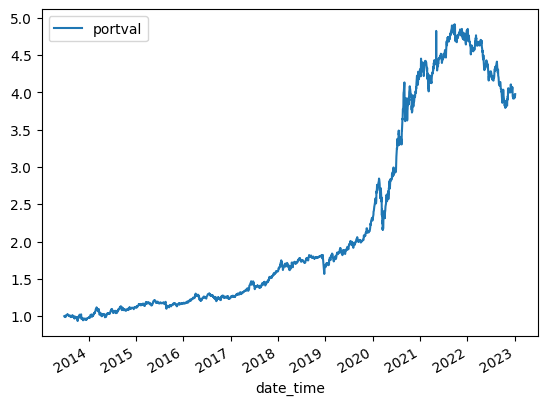

In [13]:
### 5. portfolio value 
individual_port_val_df = calculate_portvals(price_df, target_weight_df)
display(individual_port_val_df)
display(individual_port_val_df.sum(axis=0))

portval_df = individual_port_val_df.sum(axis=1).to_frame("portval")
display(portval_df)

portval_df.plot()

In [14]:
### 5.1: performance indicator

In [30]:
get_returns_df(portval_df, N=1, log=True)

,portval
date_time,
2013-06-28,0.000000
2013-07-01,0.003077
2013-07-02,0.001168
2013-07-03,-0.000990
2013-07-05,-0.015685
...,...
2022-12-28,-0.010213
2022-12-29,0.010065
2022-12-30,-0.005854


In [18]:
get_cum_returns_df(get_returns_df(portval_df, N=1, log=True), log=True)

,portval
date_time,
2013-06-28,1.000000
2013-07-01,1.003081
2013-07-02,1.004253
2013-07-03,1.003260
2013-07-05,0.987646
...,...
2022-12-28,3.921027
2022-12-29,3.960693
2022-12-30,3.937575


In [20]:
# type(get_CAGR_series(portval_df))#.to_frame("CARG")
get_CAGR_series(portval_df, num_day_in_year=252)#.to_frame("CARG")

portval    0.156232
Name: 2023-01-04 00:00:00, dtype: float64

In [24]:
get_sharpe_ratio(get_returns_df(portval_df, N=1, log=True), num_day_in_year=252, yearly_rfr=0.025)#.to_frame("sharpe_ratio")

portval    0.756629
dtype: float64

,drawdown mean,drawdown std,longest days,longest period
portval,14,45,467,2021-09-24 ~ 2023-01-04


,MDD
portval,-0.241117


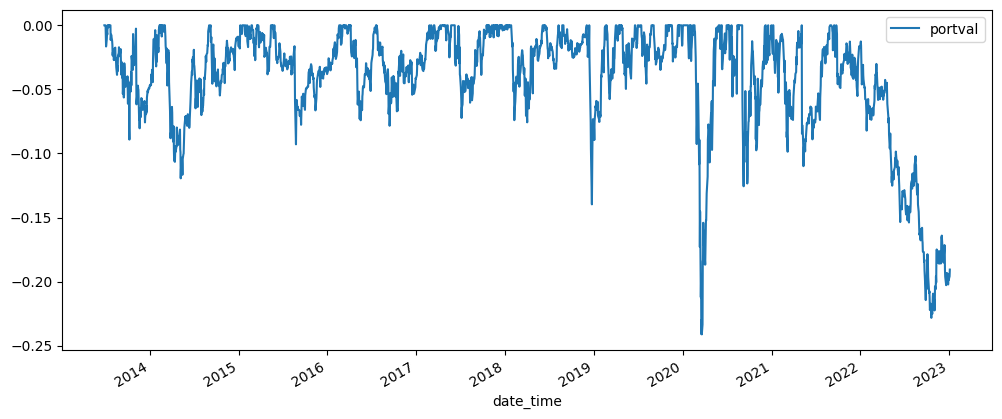

In [28]:
dd_df, mdd_series, longest_dd_period_df = get_drawdown_infos(portval_df)
dd_df.plot(figsize = (12, 5))
display(longest_dd_period_df)
display(mdd_series.to_frame("MDD"))

In [ ]:
### 여기까지가 기본 
### 아래의 과정은 성과 향상을 위한 방법 고민이며 핵심파트

In [ ]:
### 비교를 위한 작업
result_portval_dict = {}
result_portval_dict['daa_first'] = individual_port_val_df.sum(axis=1)

In [ ]:
### 성능 향상을 위한 방법론 고민해보자.

In [ ]:
### 1. 안전자산군을 다양화하자.

In [ ]:
individual_port_val_df.sum(axis=0)

BND        0.000000
GOOGL    415.315263
HD       394.538108
IAU      448.887433
IEF      441.982741
INTU     484.696329
KO       181.281993
NOW      452.846430
PEP      246.144810
SHV      446.000628
SLV      277.855702
TLT      316.809430
TSLA     430.010070
UNH      403.897822
VNQ      387.070614
VWO        0.000000
dtype: float64

array([[<AxesSubplot: title={'center': 'SHV'}>,
        <AxesSubplot: title={'center': 'IEF'}>],
       [<AxesSubplot: title={'center': 'TLT'}>,
        <AxesSubplot: title={'center': 'IAU'}>],
       [<AxesSubplot: title={'center': 'SLV'}>,
        <AxesSubplot: title={'center': 'VNQ'}>]], dtype=object)

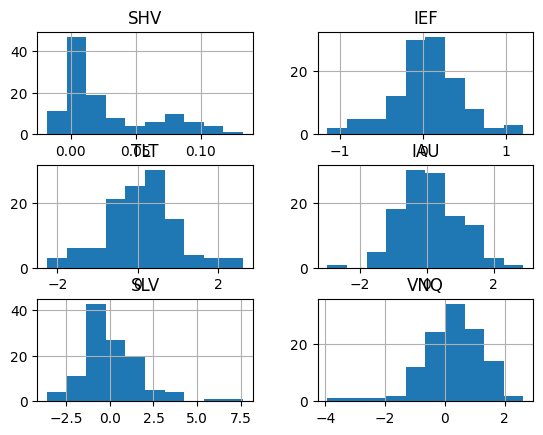

In [ ]:
momentum_result_df[bond_asset].hist()

[(-10.0, 40.0)]

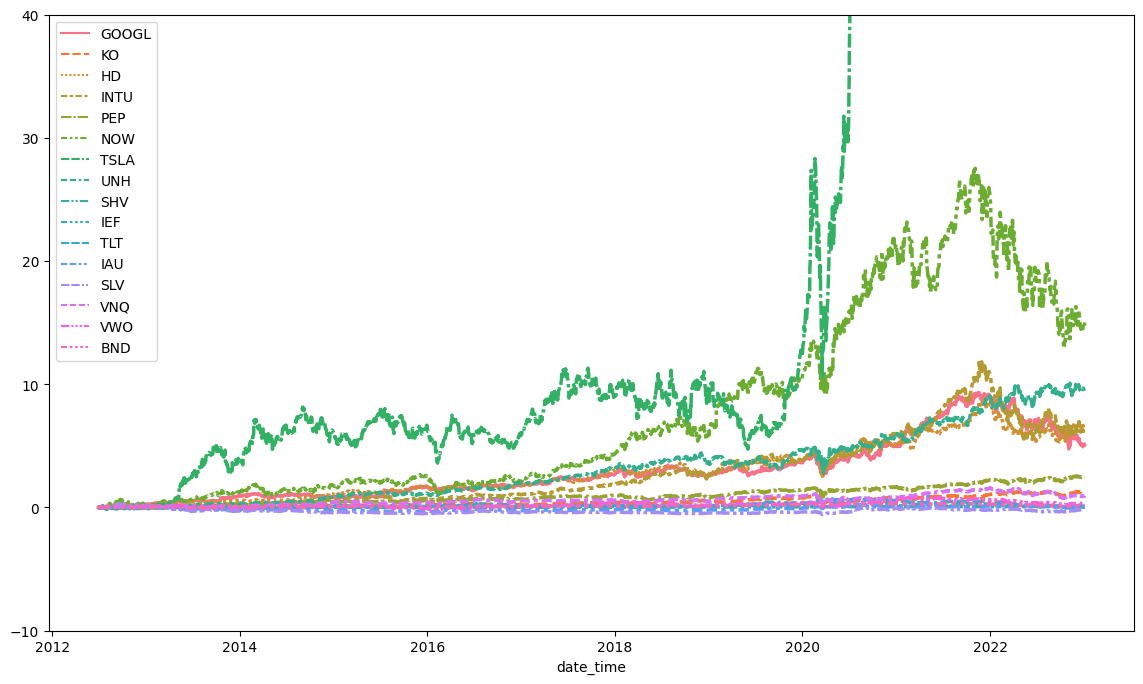

In [ ]:
my_data = (price_df / price_df.iloc[0]) -1
my_data
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8))
line = sns.lineplot(data=my_data, linewidth=2.5, ax = ax)
line.set(ylim=(-10, 40))

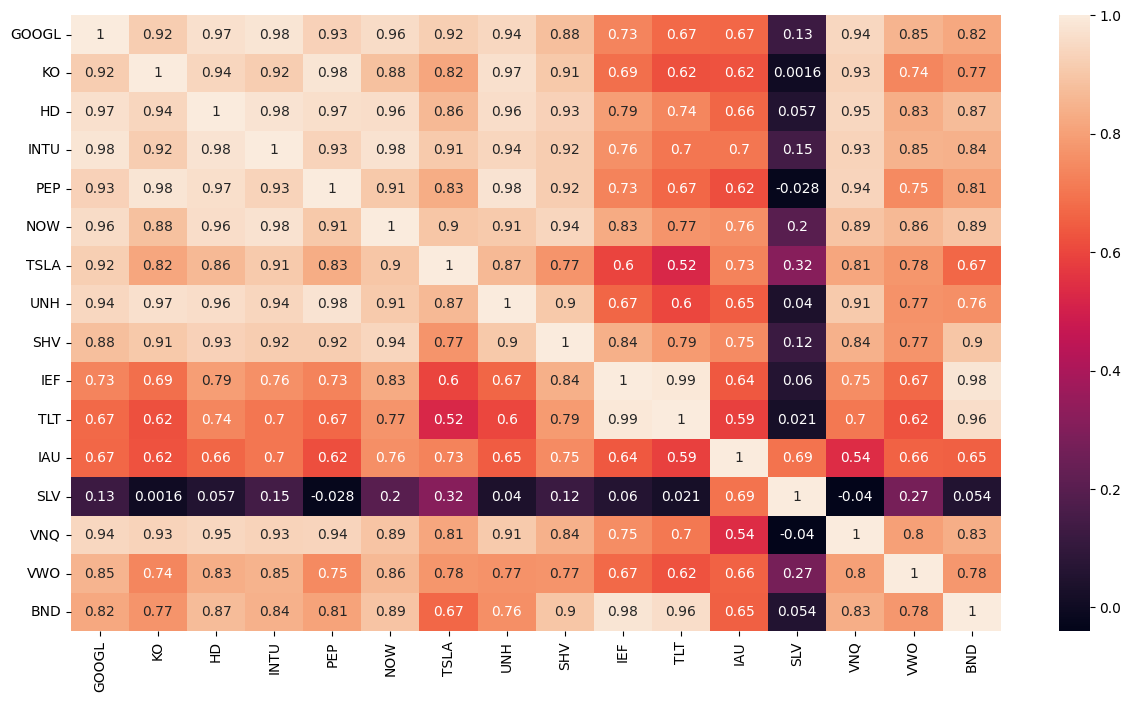

In [ ]:
my_data.corr()
sns.heatmap(my_data.corr(), annot=True)
# heatmap = sns.heatmap(my_data.corr(), annot=True, cmap="YlGnBu")
# heatmap = sns.heatmap(my_data.corr(), annot=True, cmap="YlGnBu", figsize = (14,8))
plt.gcf().set_size_inches(15, 8)

In [ ]:
def pct_corr(df1, df2, size = (15,8)) : 
    df1_pct = df1.pct_change()
    df2_pct = df2.pct_change()
    df3 = pd.concat([df1,df2], axis = 1)
    
    start = [df3[col].first_valid_index() for col in df3.columns]
    start_date =min(start) 
    df4 = df3.loc[start_date : ]
    df4.dropna(inplace =True)
    print(df4.head())
    df4.corr()
    sns.heatmap(df4.corr(), annot=True)
    return plt.gcf().set_size_inches(size)

In [ ]:
### 미래에셋에서 뽑은 자산들과 움직임이 반대인 자산들 추려서 안전 자산으로 설정해보자
# 1. 부동산 

real_estate = ["VNQI", "FREL", "GQRE", "FFR"]
df1 = price_info(real_estate)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df2 = all_ticker_df

In [ ]:
df2

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
date_time,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.154284,41.959522,53.893169,52.216084,24.600000,2.086000,49.762310,102.687843,89.848320,97.563141,31.120001,26.650000,43.129208,29.418520,64.217361
2012-07-02,14.526276,28.417126,41.975365,54.192822,52.289967,24.770000,2.026667,47.856895,102.678535,90.265198,98.569748,31.120001,26.730000,43.603813,29.447990,64.352371
2012-07-03,14.710460,28.503553,40.898472,54.619621,52.289967,25.309999,2.044000,46.683006,102.687843,90.040092,97.812279,31.600000,27.490000,43.860886,29.985825,64.260803
2012-07-05,14.912913,28.247896,41.262703,54.410770,51.853977,25.959999,2.082000,47.474106,102.678535,90.281868,98.312050,31.260000,26.879999,43.590622,29.727955,64.443863
2012-07-06,14.664164,28.139883,41.294380,52.708443,51.890911,25.840000,2.066000,47.482601,102.687843,90.598587,99.225746,30.840000,26.299999,43.696106,29.190121,64.504883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,86.019997,63.570000,315.730011,376.500000,181.750000,376.049988,112.709999,528.450012,109.870003,95.709999,99.550003,34.220001,21.600000,81.300003,38.790001,71.870003
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996


                 VNQI       FREL       GQRE        FFR      GOOGL         KO  \
2015-02-05  41.356445  18.697136  47.425331  46.850101  26.491501  32.324772   
2015-02-06  40.970142  18.227242  46.908024  45.929901  26.694000  32.061771   
2015-02-09  40.489067  18.151455  46.287247  45.430000  26.464001  31.891603   
2015-02-10  40.729599  18.204512  46.446415  45.770000  27.007999  32.796608   
2015-02-11  40.634853  18.174192  46.462341  45.511002  26.900000  32.773407   

                   HD       INTU        PEP        NOW       TSLA        UNH  \
2015-02-05  90.870132  85.770790  76.671806  74.220001  14.732667  96.359184   
2015-02-06  90.911827  82.142059  76.751137  74.940002  14.490667  95.278862   
2015-02-09  90.328217  82.151390  76.163879  72.879997  14.498667  94.295990   
2015-02-10  92.270821  83.367226  77.766983  73.320000  14.419333  96.491997   
2015-02-11  91.970680  83.039871  79.679611  73.879997  14.186667  97.271225   

                   SHV        IEF     

/var/folders/6m/p0mfz7q566zcnpddq0xg_r740000gn/T/ipykernel_56684/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


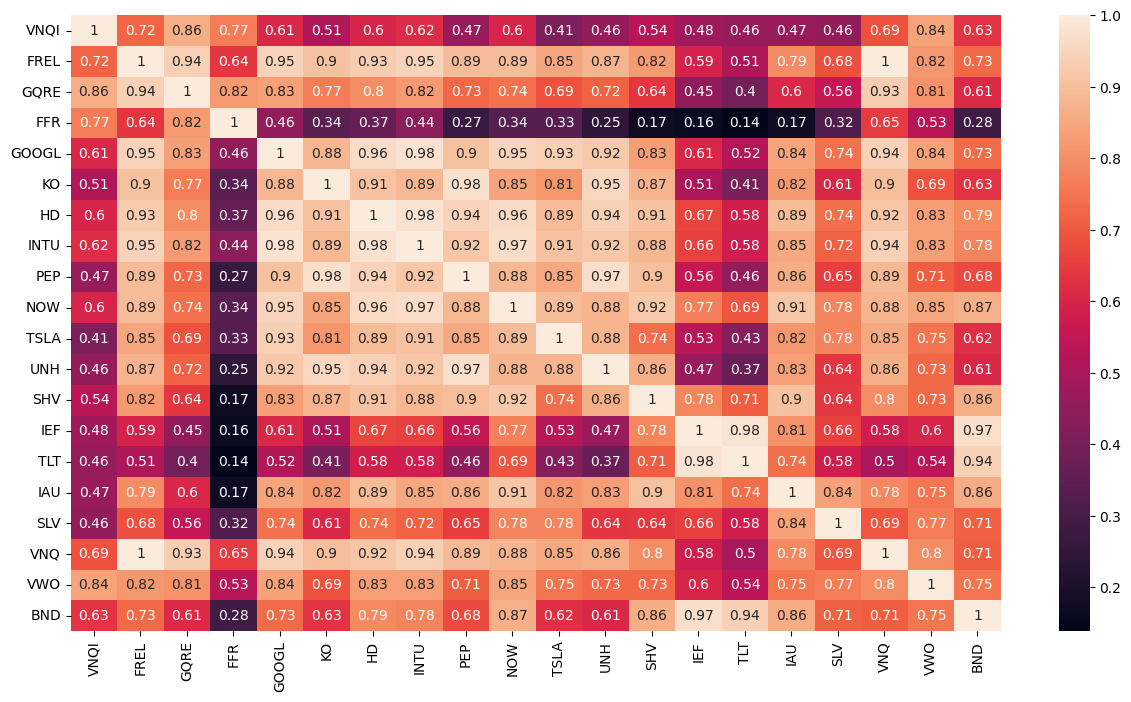

In [ ]:
pct_corr(df1, df2, size = (15,8))

### 전세계 서른 개의 국가 부동산에 투자하는 VNQI가 가장 상관관계가 낮다.  

In [ ]:
shortterm = ['BSV','PGHY']

shortterm_df = price_info(shortterm)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
for col in shortterm_df.columns : 
    print(col, shortterm_df[col].first_valid_index())

BSV 2007-04-10 00:00:00
PGHY 2013-06-21 00:00:00


                  BSV       PGHY      GOOGL         KO         HD       INTU  \
2013-06-21  68.379082  15.217857  22.045296  29.437786  59.637466  53.103653   
2013-06-24  68.208206  15.180529  21.766518  29.267498  59.387024  52.782425   
2013-06-25  68.259460  15.149425  21.676678  29.408182  59.895981  53.975563   
2013-06-26  68.344872  15.192965  21.863113  29.859818  61.132034  54.562950   
2013-06-27  68.447441  15.298740  21.948700  29.807972  61.616798  55.792793   

                  PEP        NOW      TSLA        UNH         SHV        IEF  \
2013-06-21  60.973373  39.240002  6.636667  55.248508  102.714890  86.316406   
2013-06-24  60.973373  39.430000  6.766000  55.896976  102.724213  86.104942   
2013-06-25  60.904888  39.599998  6.826667  55.101524  102.724213  86.003441   
2013-06-26  61.863663  40.889999  7.048000  56.009369  102.714890  86.350281   
2013-06-27  62.198463  40.930000  7.283333  57.141994  102.714890  86.815544   

                  TLT        IAU      

/var/folders/6m/p0mfz7q566zcnpddq0xg_r740000gn/T/ipykernel_56684/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


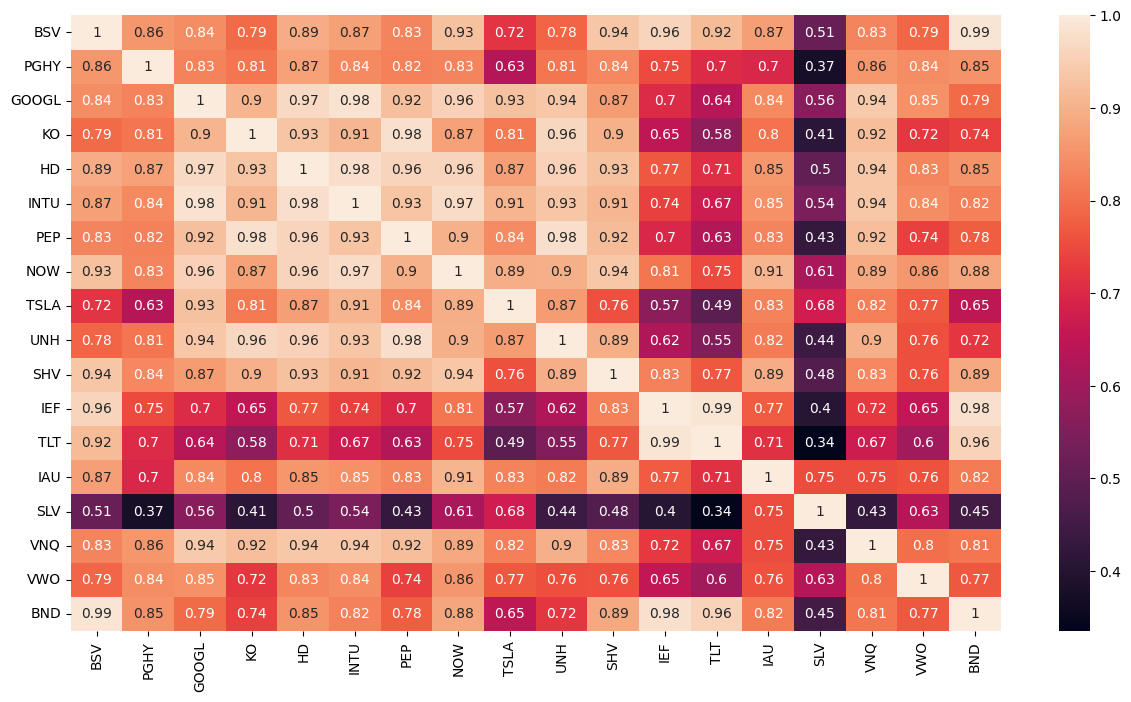

In [ ]:
pct_corr(shortterm_df, df2, size = (15,8))

# ['BSV','PGHY'] 둘 다 선택해보자

In [ ]:
## 에너지
energy = ['NEE',
 'DUK',
 'D',
 'XEL',
 'CNP',
 'DTE',
 'WEC',
 'VLO',
 'ES',
 'ATO',
 'DVN',
 'EVRG',
 'LNT',
 'NRG',
 'CTRA',
 'SRE',
 'CMS',
 'SM',
 'OGE',
 'FANG',
 'SWN',
 'CNX',
 'PTEN',
 'CHRD',
 'PBF',
 'AEIS',
 'PDCE',
 'GPRE',
 'HLX',
 'SXC',
 'ENPH',
 'ESOA',
 'CGRN',
 'CBAT',
 'CLNE',
 'ERII',
 'FCEL',
 'HNRG',
 'MGEE',
 'CREG',
 'DQ',
 'OESX',
 'VTNR',
 'EPSN',
 'EFOI',
 'USEG',
 'AMPY']
len(energy)

47

In [ ]:
energy_df = price_info(energy)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df1
df1_1 = energy_df.iloc[:,0:8]
df1_2 = energy_df.iloc[:,8:16]
df1_3 = energy_df.iloc[:,16:24]
df1_4 = energy_df.iloc[:,24:32]
df1_5 = energy_df.iloc[:,32:40]
df1_6 = energy_df.iloc[:,40:]

/var/folders/6m/p0mfz7q566zcnpddq0xg_r740000gn/T/ipykernel_56684/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


                  CMS         SM        OGE       FANG        SWN        CNX  \
2012-10-12  17.248795  52.775852  19.520411  15.341784  36.110001  28.367109   
2012-10-15  17.350815  52.603725  19.720091  15.560954  36.189999  27.737442   
2012-10-16  17.372679  53.722538  19.685661  15.596021  36.110001  28.084568   
2012-10-17  17.613157  54.831795  19.723532  15.517120  36.099998  28.924116   
2012-10-18  17.722464  55.099552  19.806160  15.517120  35.990002  29.125935   

                 PTEN       CHRD      GOOGL         KO  ...      TSLA  \
2012-10-12  14.871281  23.497015  18.637386  27.718491  ...  1.842667   
2012-10-15  14.827463  23.184330  18.543043  27.645987  ...  1.822000   
2012-10-16  15.177998  23.695299  18.636135  27.479221  ...  1.870667   
2012-10-17  15.616162  23.702927  18.906157  27.363228  ...  1.921333   
2012-10-18  15.607400  23.672422  17.392391  27.435722  ...  1.869333   

                  UNH         SHV        IEF        TLT        IAU        SLV  \

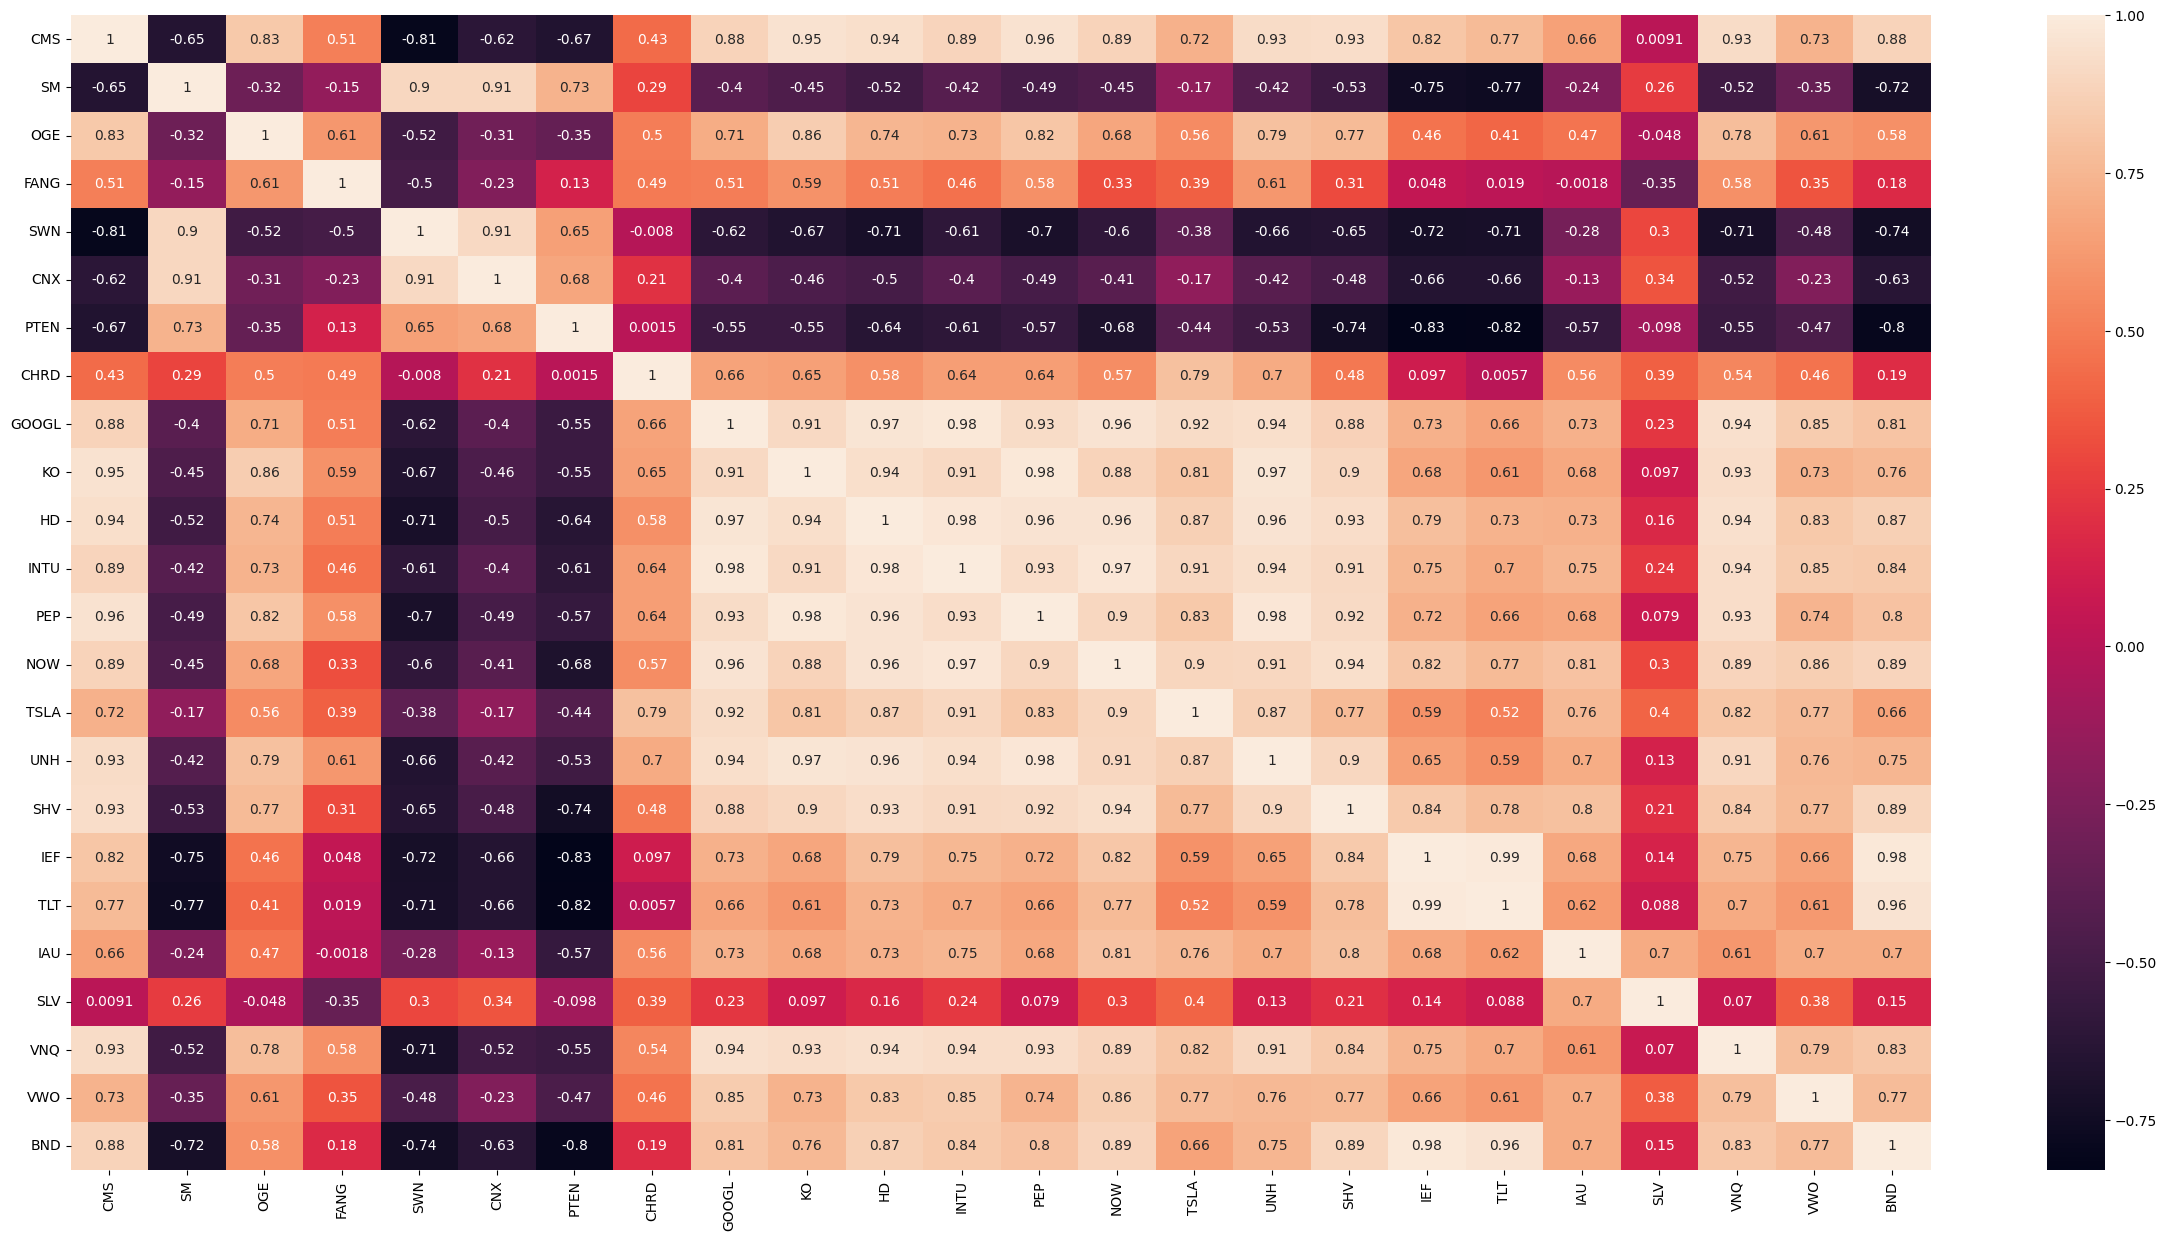

In [ ]:
pct_corr(df1_3, df2, (30,15))

# ["CNP", "VLO", "CTRA", "SM", "OGE", "FANG","SWN", ""CNX","PTEN","CGRN","FCEL","HNRG",CREG, "EFOI", "USEG", "AMPY"]

In [ ]:
# 부동산, 단기금융상품, 에너지
real_et =["VNQI"]
shortterm = ['BSV','PGHY']
energy = ["CNP", "VLO", "SWN", "CTRA", "SM", "OGE", "FANG","SWN", "CNX","PTEN","CGRN","FCEL","HNRG", "CREG", "EFOI", "USEG", "AMPY"]
alter = real_et + shortterm + energy
alter
alter_df = price_info(alter)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

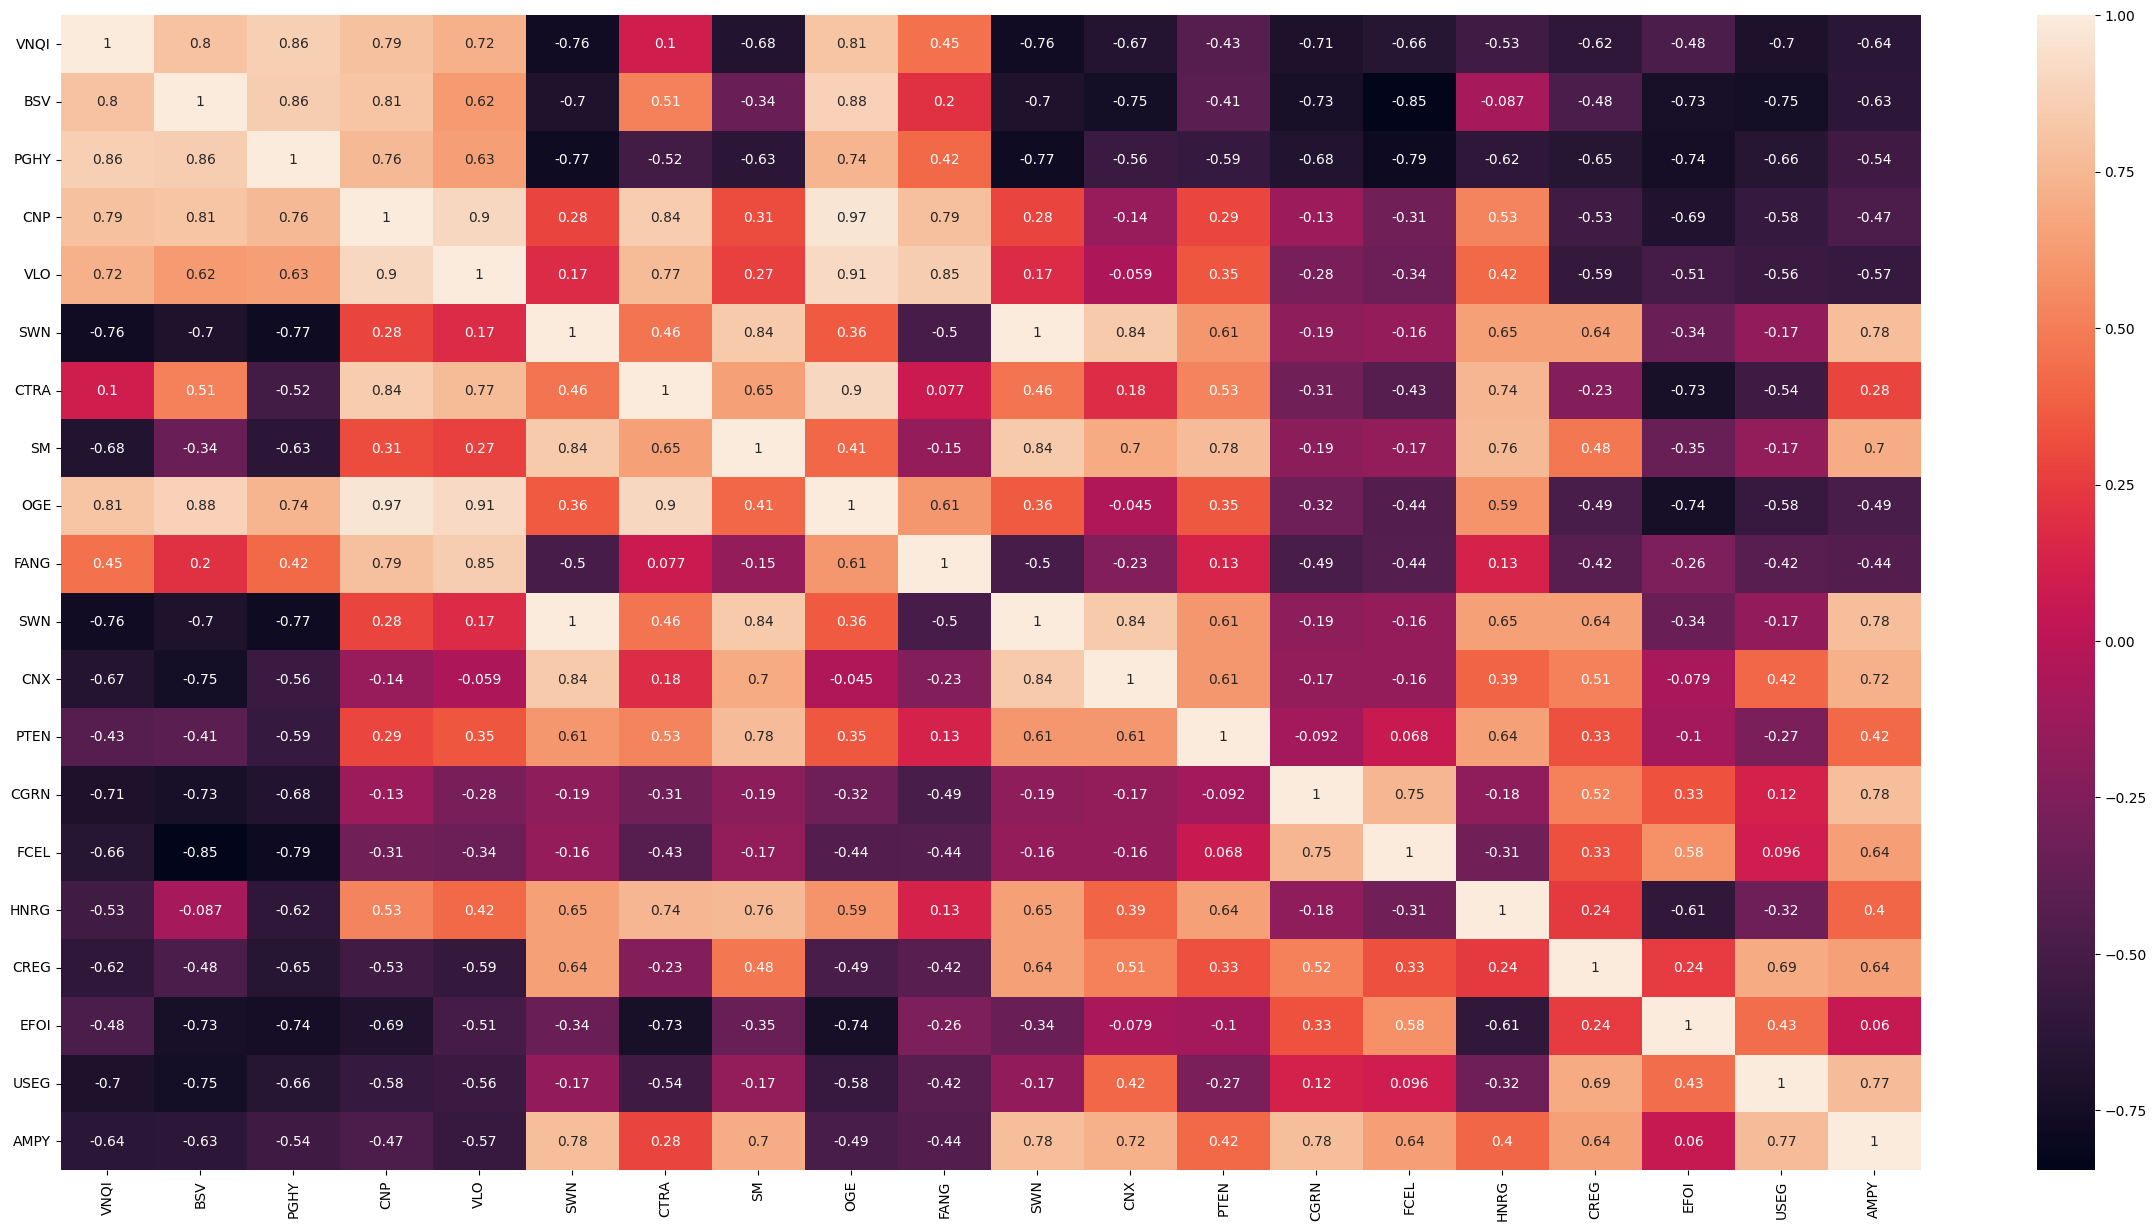

In [ ]:
alter_df.corr()
sns.heatmap(alter_df.corr(), annot=True)
plt.gcf().set_size_inches(30, 15)

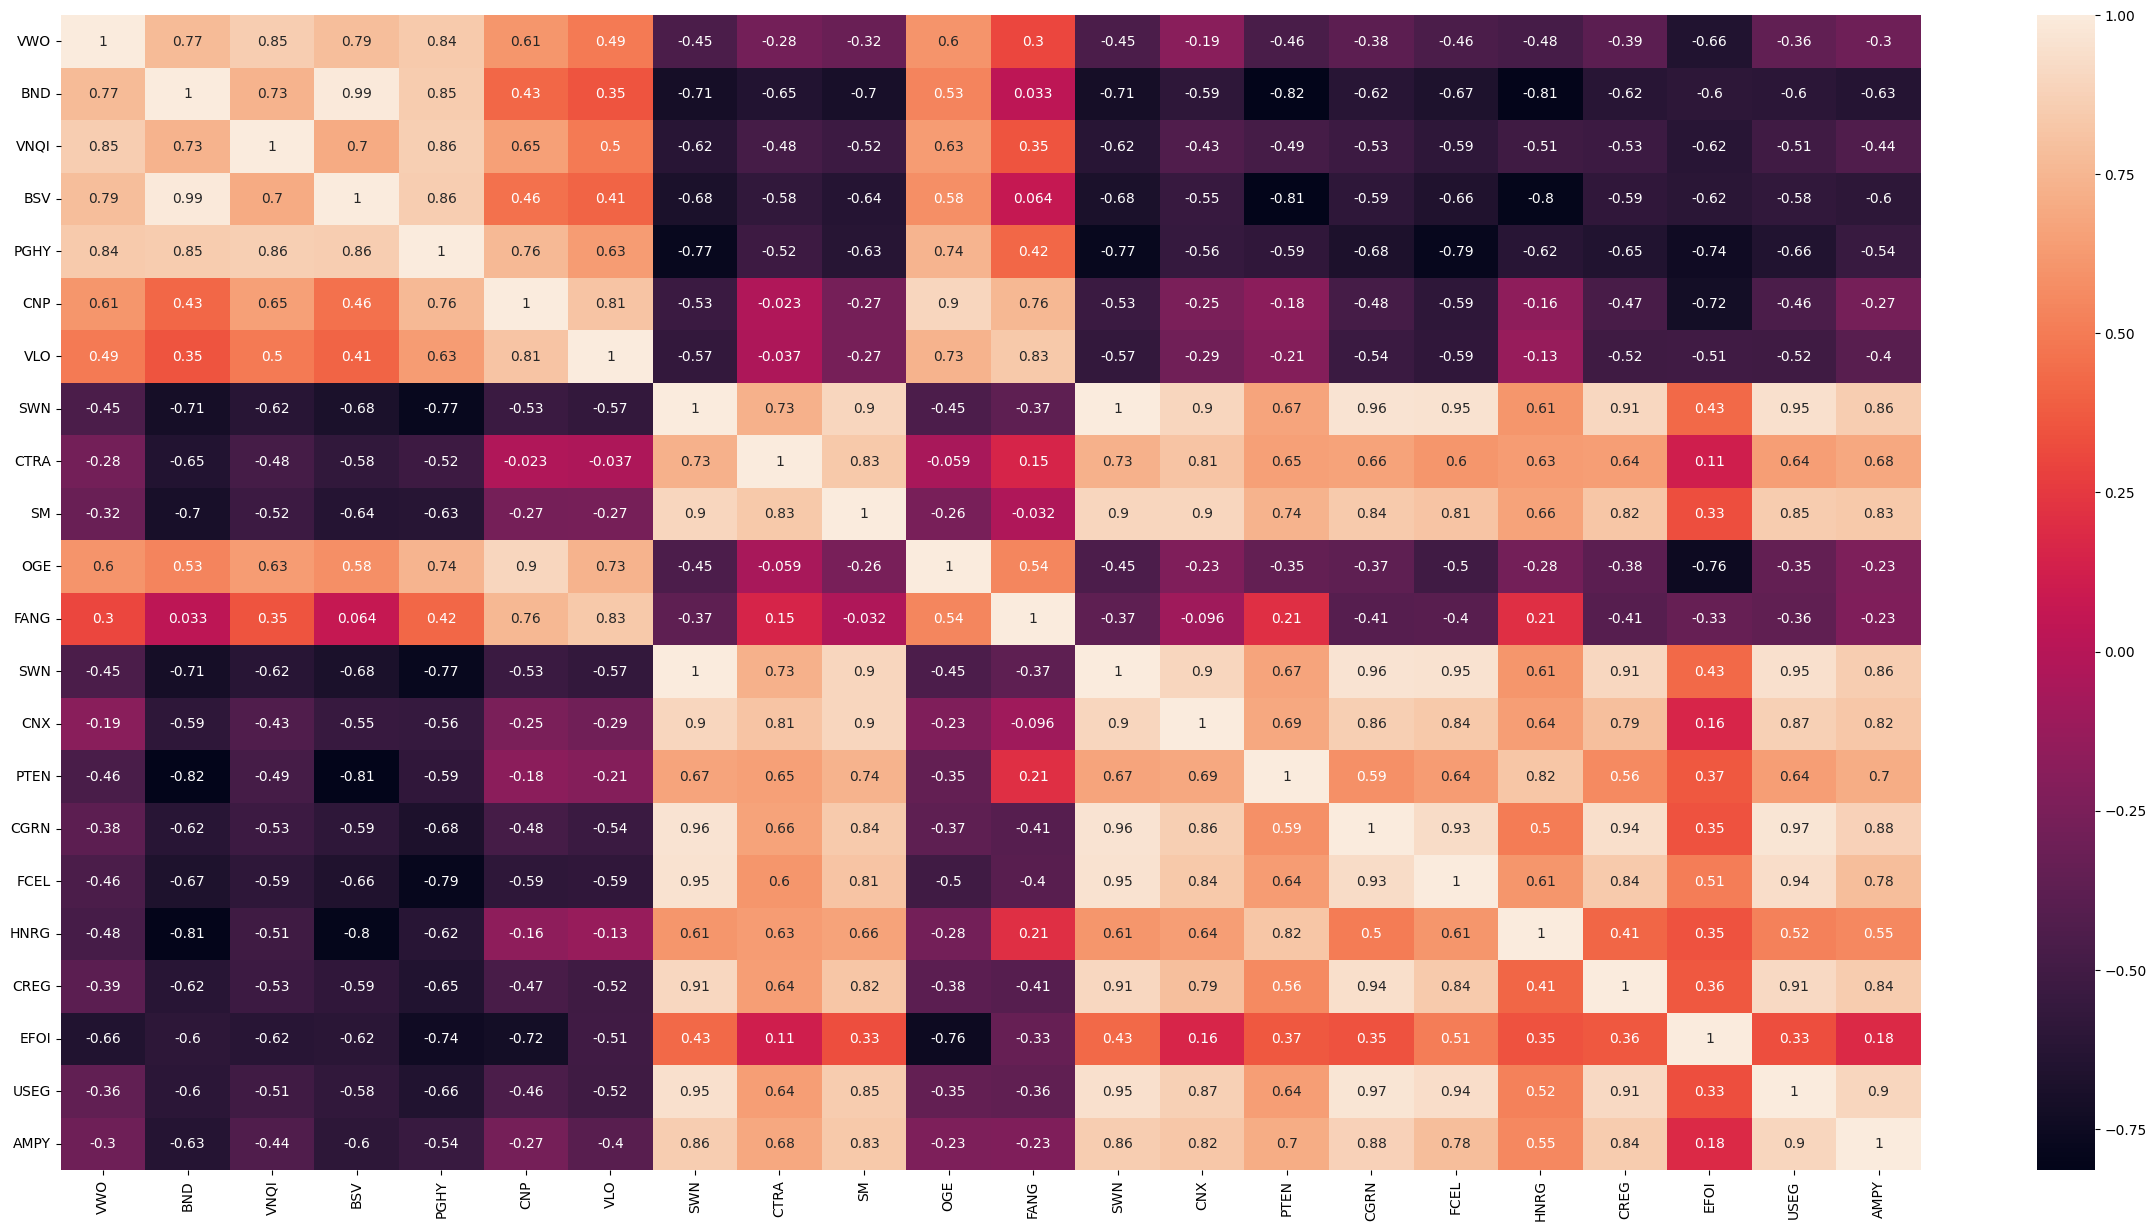

In [ ]:
test_with_canary = pd.concat([price_df[canary_asset], alter_df], axis = 1)
test_with_canary.dropna(inplace = True)
test_with_canary.corr()
sns.heatmap(test_with_canary.corr(), annot=True)
plt.gcf().set_size_inches(30, 15)